<a href="https://colab.research.google.com/github/stephyi/10Academy/blob/master/AfterWork_Data_Science_Data_Wrangling_%26_Visualisation_%5BData_Science_Dojo%5D_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#6a5acd'>Data Science Dojo - Project Solution</font>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

The management would like you to get your assistance in understanding the currently subscribed customers. Your recommendations informed by your analysis will help them make decisions on undertaking effective customer retention programs.

> To put it simply, the task is to understand current customers in order to understand how to retain them.

### b) Defining the Metric for Success

The solution will have satisfied the research question when you can identify the factors that contribute to customer churn.

### c) Understanding the context 

MTN Telecom offers mobile and internet services to its customers. These services include phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

You have been provided with the current customer data. Since you will be working towards a descriptive report than a predictive one, you decide to think critically of the kind of questions that would help you craft customer retention programs. You then later use the given data set to answer your questions but before you start, you reading, explore, clean and visualise your dataset.

### d) Recording the Experimental Design

The steps to be taken include:
1. Load dataset and preview its summarized information to get a feel of what you will be working with.
2. Carry out data cleaning.
3. Carry out data analysis.
4. Interpret results.
5. Provide recommendations based on results of analysis.
6. Challenge your solution.

### e) Data Relevance

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to preview all columns
pd.set_option("display.max.columns", None)

# for styling
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.style.use("ggplot")

In [ ]:
# loading the dataset

# df = pd.read_csv('https://bit.ly/2ZlpzjF')
df = pd.read_csv('telecom_customer - telecom_customer.csv')
df.head()

,customerID,GENDER,SeniorCitizen,PARTNER,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TECHSUPPORT,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# getting our dataset shape
df.shape

(7050, 21)

This data set has 7,043 records and 21 variables.

In [ ]:
# dropping duplicates if any are present
df.drop_duplicates(inplace = True)
df.shape

(7043, 21)

No duplicated values were found in the dataset so none were dropped.

In [ ]:
# dropping missing values
df.dropna(inplace = True)
df.shape

(7003, 21)

40 missing values were dropped, which isn't a big loss.

In [ ]:
# properly formatting columns
df.columns = ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn']
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
# previewing the number of unique values in each column
df.nunique()

customer_id          7003
gender                  2
senior_citizen          2
partner                 2
dependents              2
tenure                 79
phone_service           2
multiple_lines          3
internet_service        3
online_security         3
online_backup           3
device_protection       3
tech_support            3
streaming_tv            3
streaming_movies        3
contract                3
paperless_billing       2
payment_method          6
monthly_charges      1585
total_charges        6505
churn                   2
dtype: int64

In [ ]:
# checking the datatypes
df.dtypes

customer_id           object
gender                object
senior_citizen       float64
partner               object
dependents            object
tenure               float64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [ ]:
# create a loop to preview the unique values of variables with less than 10 unique values
my_variables = df.columns.to_list()
my_variables.remove('customer_id')
my_variables.remove('tenure')
my_variables.remove('monthly_charges')
my_variables.remove('total_charges')

for variable in my_variables:
    print("Showing unique values of variable:", variable)
    print(df[variable].unique())
    print()

Showing unique values of variable: gender
['Female' 'Male']

Showing unique values of variable: senior_citizen
[0. 1.]

Showing unique values of variable: partner
['Yes' 'No']

Showing unique values of variable: dependents
['No' 'Yes']

Showing unique values of variable: phone_service
['No' 'Yes']

Showing unique values of variable: multiple_lines
['No phone service' 'No' 'Yes']

Showing unique values of variable: internet_service
['DSL' 'Fiber optic' 'No']

Showing unique values of variable: online_security
['No' 'Yes' 'No internet service']

Showing unique values of variable: online_backup
['Yes' 'No' 'No internet service']

Showing unique values of variable: device_protection
['No' 'Yes' 'No internet service']

Showing unique values of variable: tech_support
['No' 'Yes' 'No internet service']

Showing unique values of variable: streaming_tv
['No' 'Yes' 'No internet service']

Showing unique values of variable: streaming_movies
['No' 'Yes' 'No internet service']

Showing unique value

We can see that some variables aren't quite right when it comes to their unique values. For example:
* 'senior_citizen' should be a boolean object (Yes/No), not a float binary (0.0/0.1)
* 'payment_method' has values with spelling errors such as "Mailed checkkk" and "Electronic chekk", which created duplicates

In [ ]:
# resolving the issues in the 'senior_citizen' variable
df.senior_citizen = df.senior_citizen.replace(0.0, 'No').replace(1.0, 'Yes')
df.senior_citizen.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# resolving the issues in the 'payment_method' variable
df.payment_method = df.payment_method.str.replace('Mailed checkkk', 'Mailed check').str.replace('Electronic checkk', 'Electronic check')
df.payment_method.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

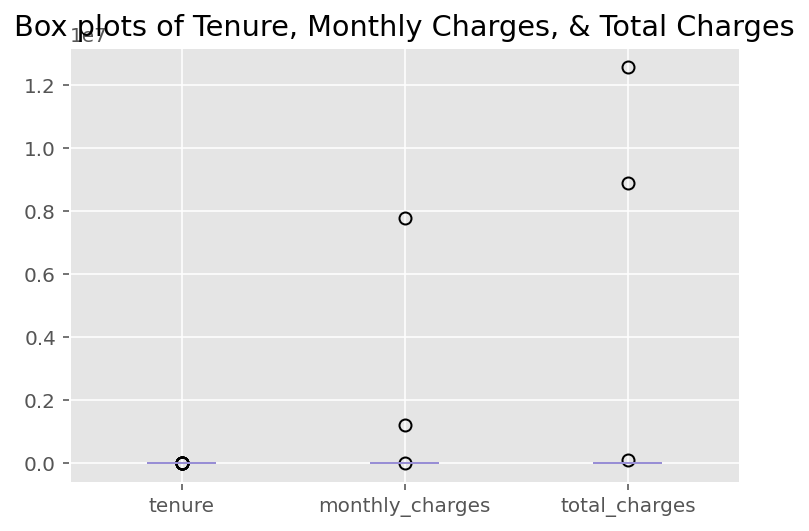

In [ ]:
# visual distribution of the outliers
df.boxplot(column = ['tenure', 'monthly_charges', 'total_charges'])
plt.title("Box plots of Tenure, Monthly Charges, & Total Charges")
plt.show()

We can see that there are several outliers in the 'tenure', 'monthly_charges', and 'total_charges' variables. We can remove them using the IQR method.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 15 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]
df.shape

(6990, 21)

We have cleaned our data and are now ready to analyze it. If you want to save the dataset for use anywhere other than this notebook, you can save it and then load it as follows:

In [ ]:
df.to_csv('telecom_customer_clean.csv', index = False)
df = pd.read_csv('telecom_customer_clean.csv')
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <font color='#2F4F4F'>3. Data Analysis</font>

Since our research question requires us to focus on how we can retain customers, the main variable to work with is the "churn" variable.

### a) Research-specific Analysis

No     5129
Yes    1861
Name: churn, dtype: int64


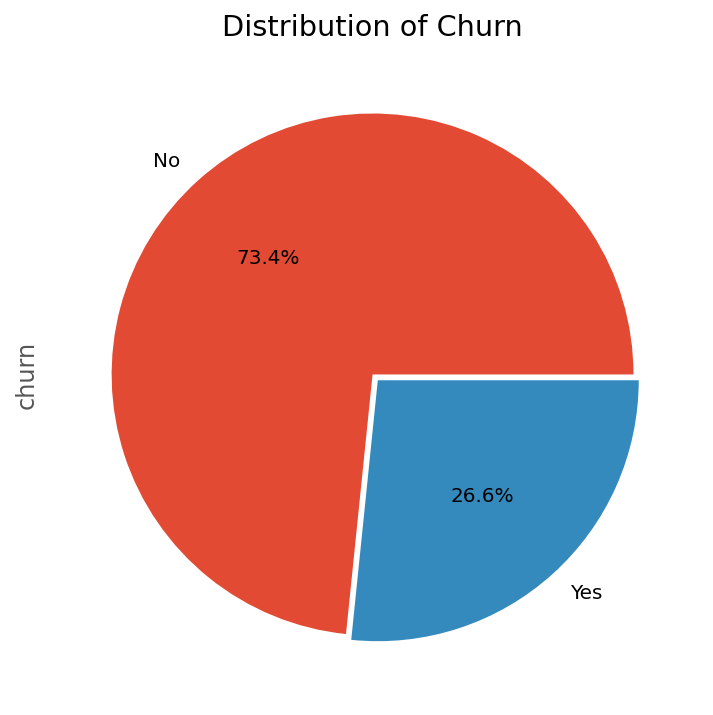

In [ ]:
print(df.churn.value_counts())
df.churn.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', figsize = [8, 6], explode = (0, 0.03))
plt.title("Distribution of Churn")
plt.show()

We see that the majority of the customers in this dataset are still subscribed to MTN.

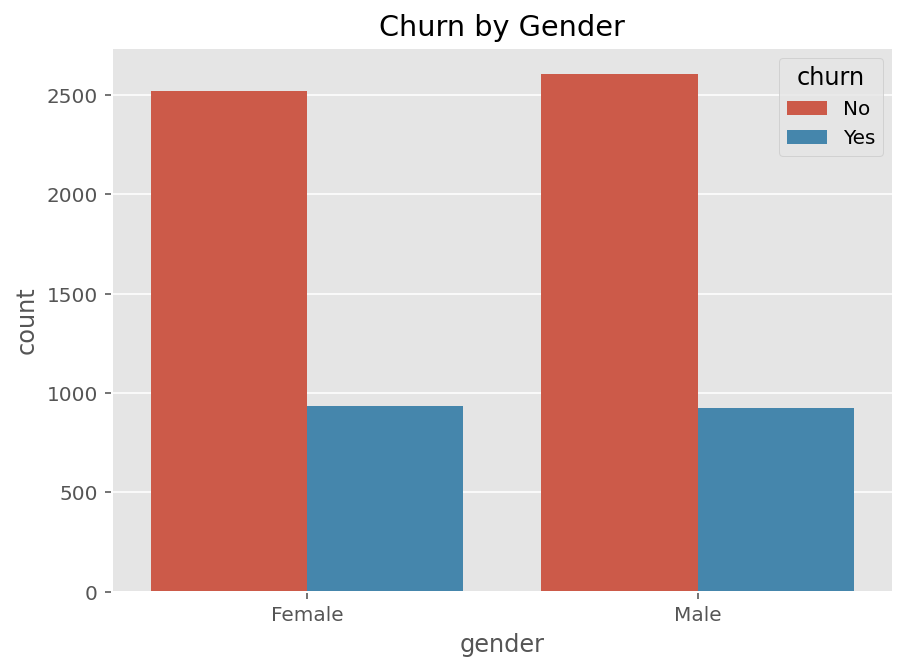

In [ ]:
# plotting the distribution of churn by gender
plt.figure(figsize=(7, 5))
sns.countplot("gender", hue = 'churn', data = df)
plt.title("Churn by Gender")
plt.show()

Here, we see that the number of male and female subscribers who churned is more or less equal. The same can be said of the number of male and female subscribers who did not churn. 

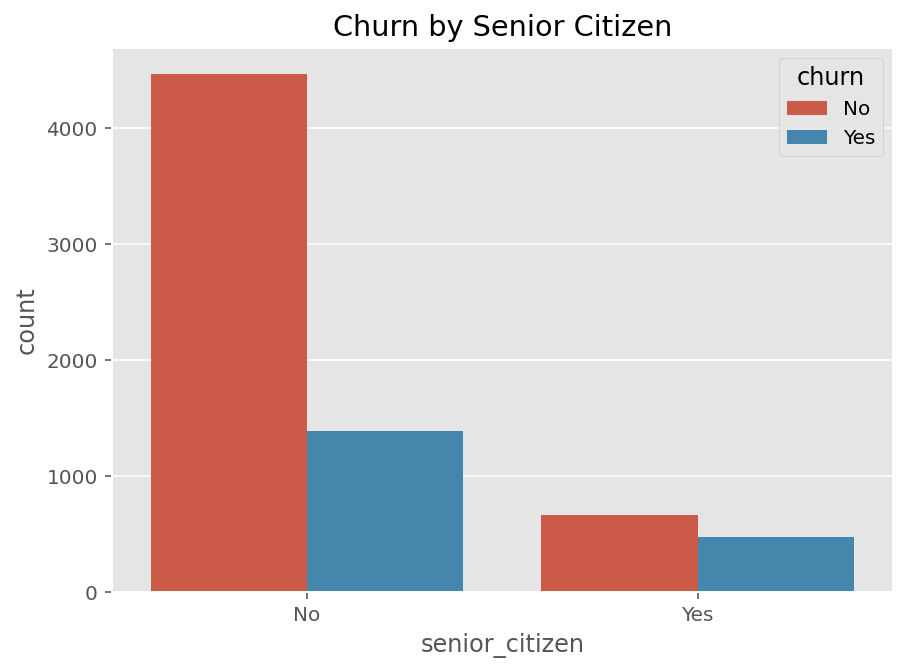

In [ ]:
# plotting the distribution of churn by senior citizen
plt.figure(figsize=(7, 5))
sns.countplot("senior_citizen", hue = 'churn', data = df)
plt.title("Churn by Senior Citizen")
plt.show()

Whether a senior citizen or not, the number of those who churned is fewer than that of those who did not.

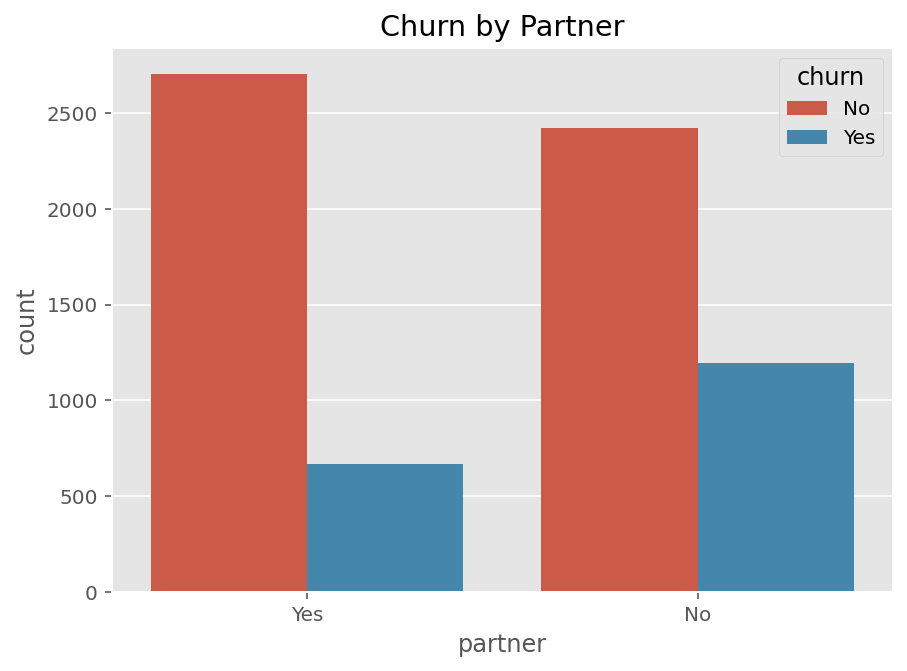

In [ ]:
# plotting the distribution of churn by partner
plt.figure(figsize=(7, 5))
sns.countplot("partner", hue = 'churn', data = df)
plt.title("Churn by Partner")
plt.show()

Those without partners churned more than those with partners.

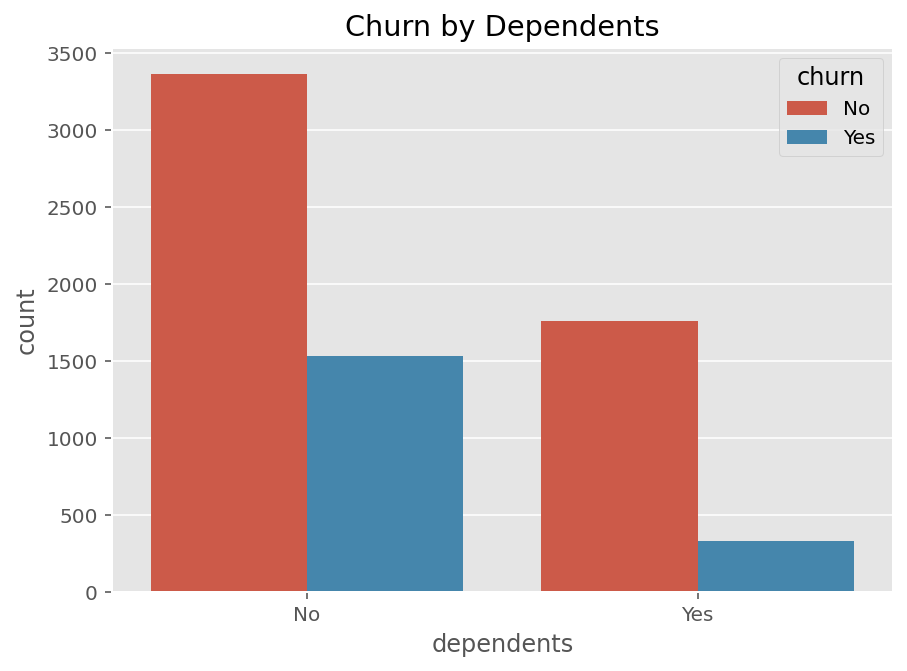

In [ ]:
# plotting the distribution of churn by dependents
plt.figure(figsize=(7, 5))
sns.countplot("dependents", hue = 'churn', data = df)
plt.title("Churn by Dependents")
plt.show()

Those without dependents churned more than those with dependents.

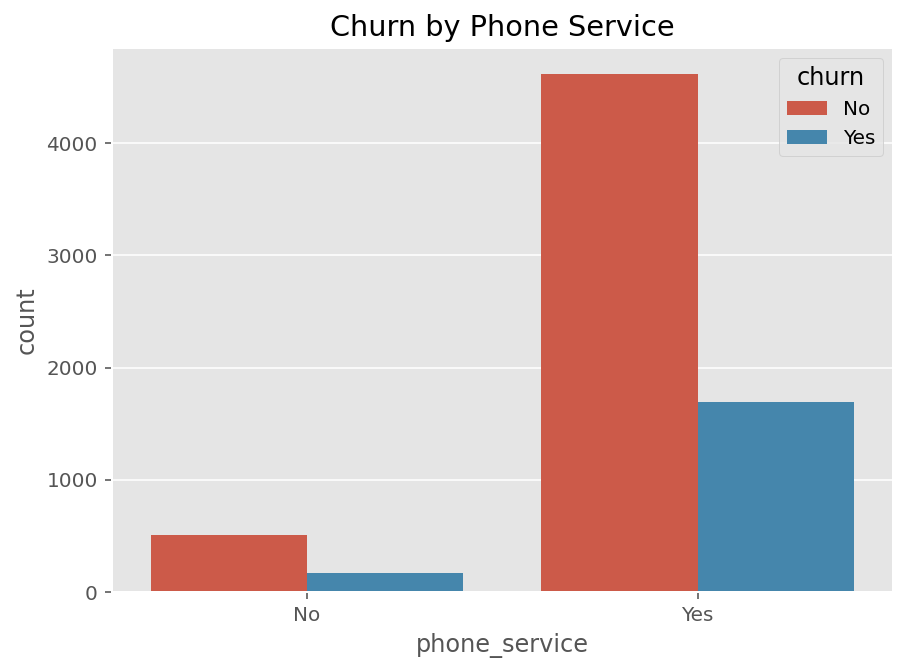

In [ ]:
# plotting the distribution of churn by phone service
plt.figure(figsize=(7, 5))
sns.countplot("phone_service", hue = 'churn', data = df)
plt.title("Churn by Phone Service")
plt.show()

Those with phone service churned more than those without phone service.

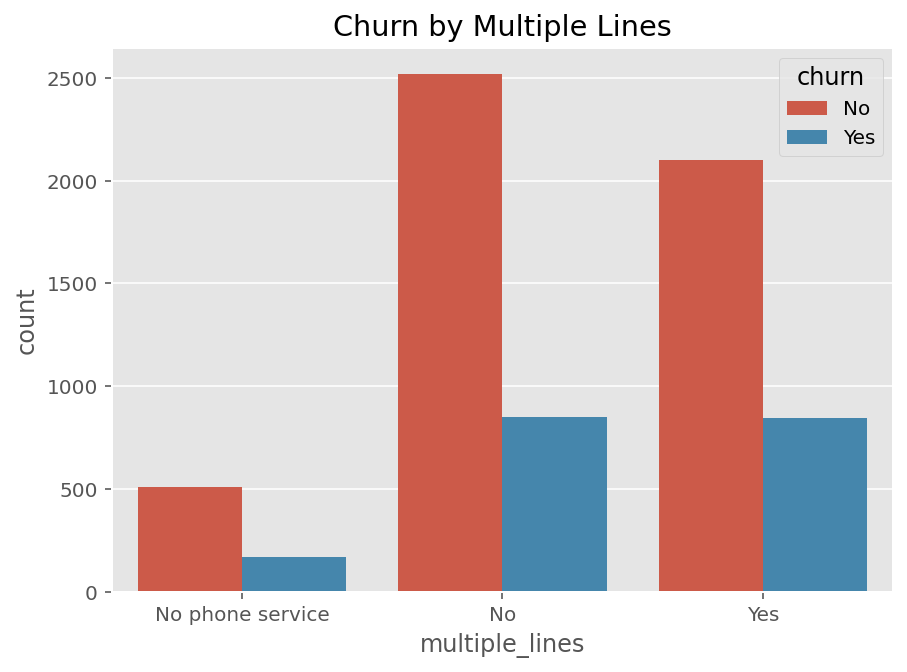

In [ ]:
# plotting the distribution of churn by multiple lines
plt.figure(figsize=(7, 5))
sns.countplot("multiple_lines", hue = 'churn', data = df)
plt.title("Churn by Multiple Lines")
plt.show()

There doesn't seem to be a significant difference between the number of those with multiple lines and the number of those without multiple lines when it comes to churning. Those with multiple lines but with no phone service reported the lowest number of churn.

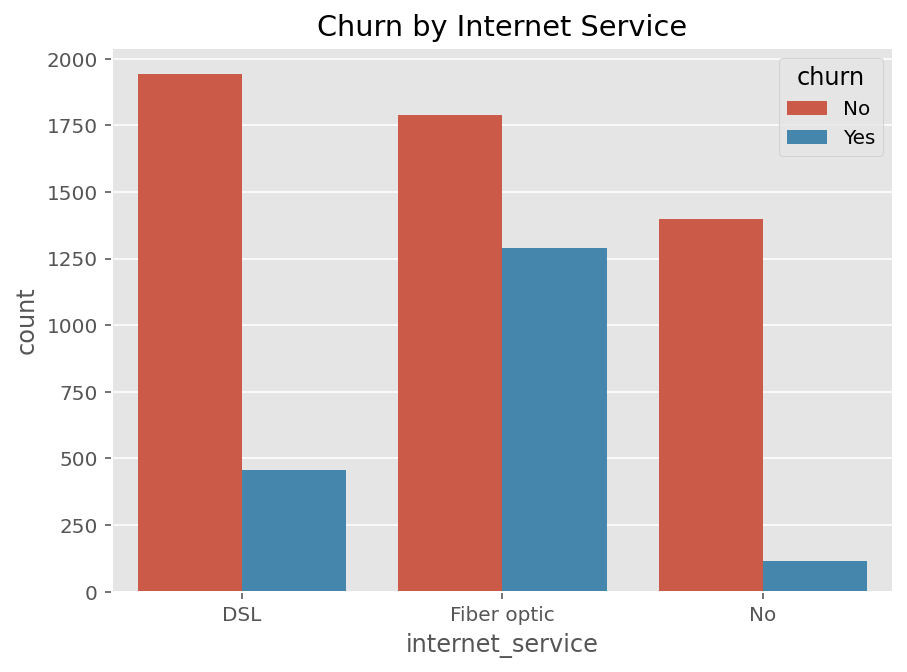

In [ ]:
# plotting the distribution of churn by internet service
plt.figure(figsize=(7, 5))
sns.countplot("internet_service", hue = 'churn', data = df)
plt.title("Churn by Internet Service")
plt.show()

Those with fiber optic were more likely to churn than those with DSL or without internet service.

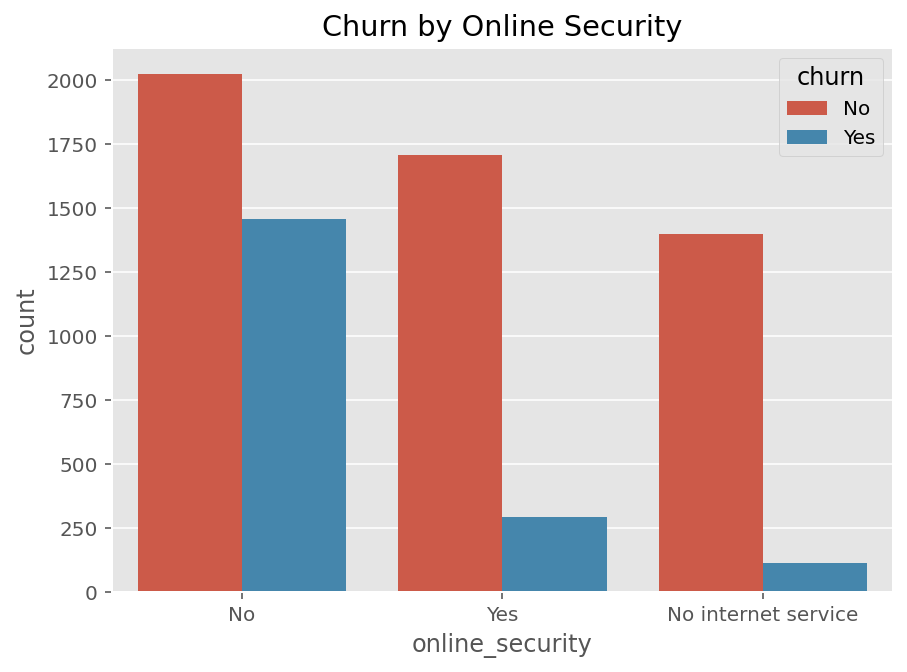

In [ ]:
# plotting the distribution of churn by online security
plt.figure(figsize=(7, 5))
sns.countplot("online_security", hue = 'churn', data = df)
plt.title("Churn by Online Security")
plt.show()

Those without online security made up the majority of those who churned, followed by those who had online security, and then those with online security but no internet service.

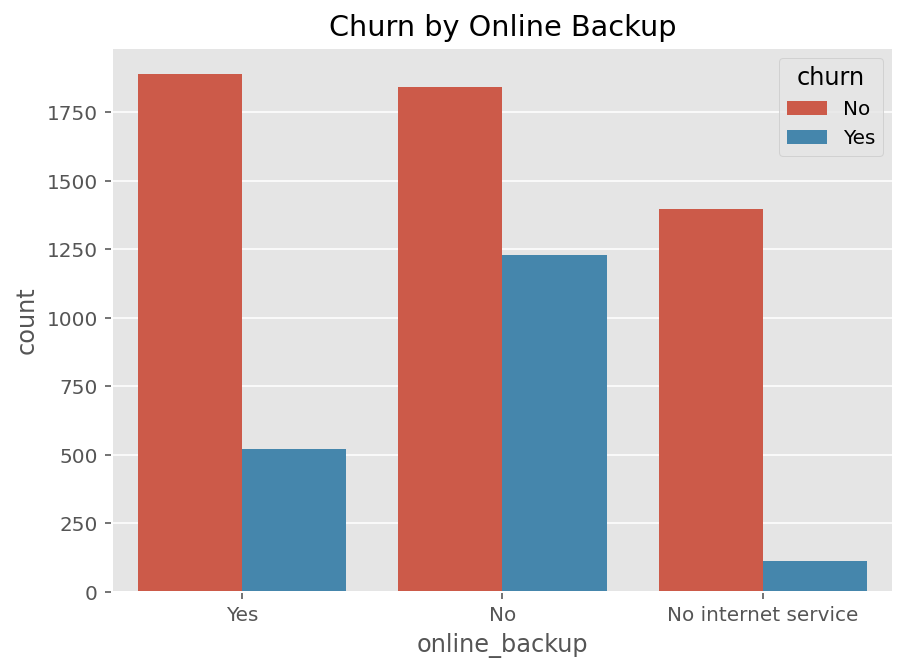

In [ ]:
# plotting the distribution of churn by online backup
plt.figure(figsize=(7, 5))
sns.countplot("online_backup", hue = 'churn', data = df)
plt.title("Churn by Online Backup")
plt.show()

Those without online backup were the highest to churn, followed by those with online backup and then those with online backup but no internet service.

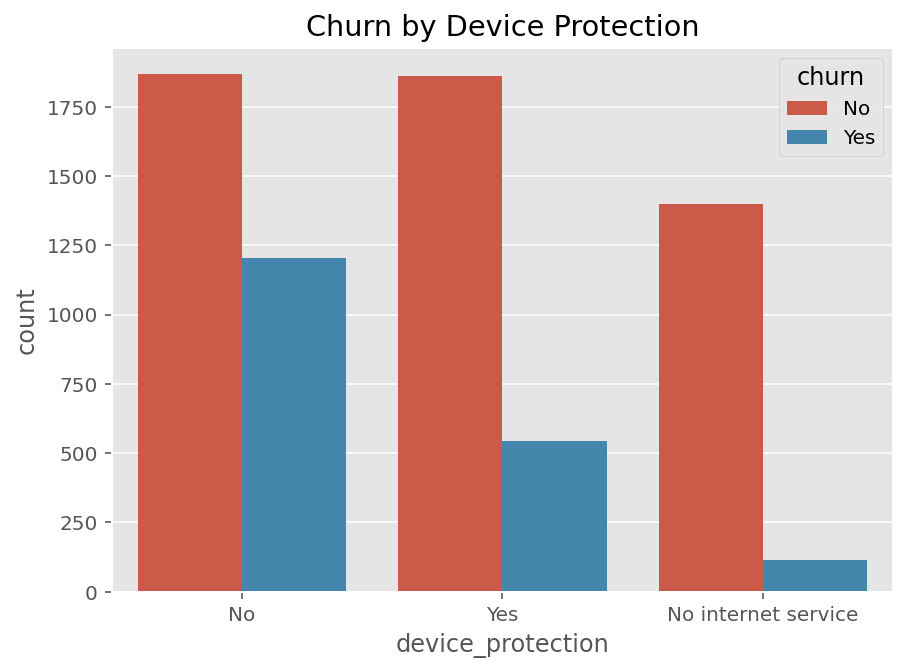

In [ ]:
# plotting the distribution of churn by device protection
plt.figure(figsize=(7, 5))
sns.countplot("device_protection", hue = 'churn', data = df)
plt.title("Churn by Device Protection")
plt.show()

Those without device protection churned more than those with device protection and those with device protection but no internet service.

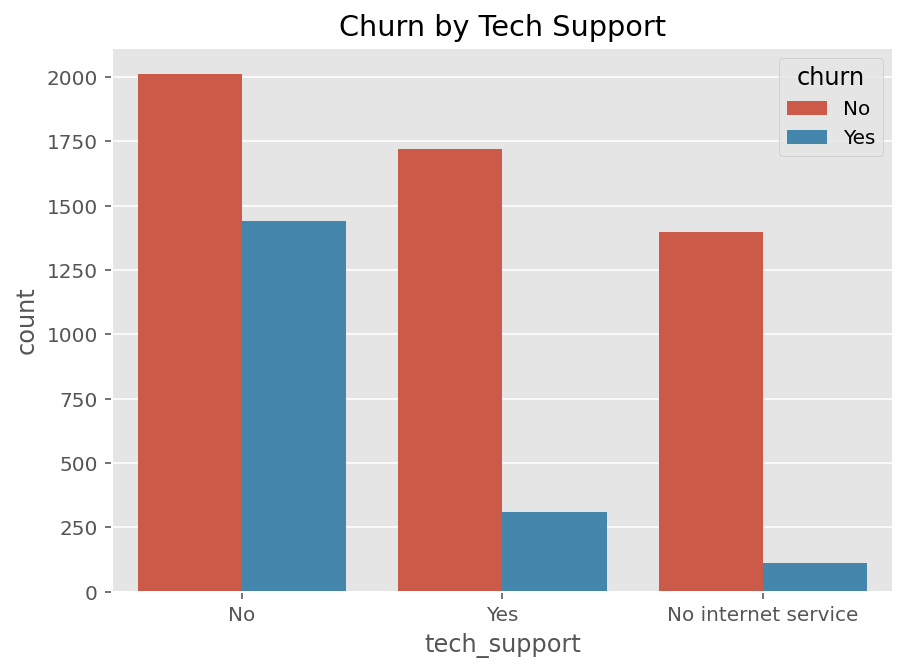

In [ ]:
# plotting the distribution of churn by tech support
plt.figure(figsize=(7, 5))
sns.countplot("tech_support", hue = 'churn', data = df)
plt.title("Churn by Tech Support")
plt.show()

Those who did not receive tech support churned more than those who did and those who received tech support but had no internet service.

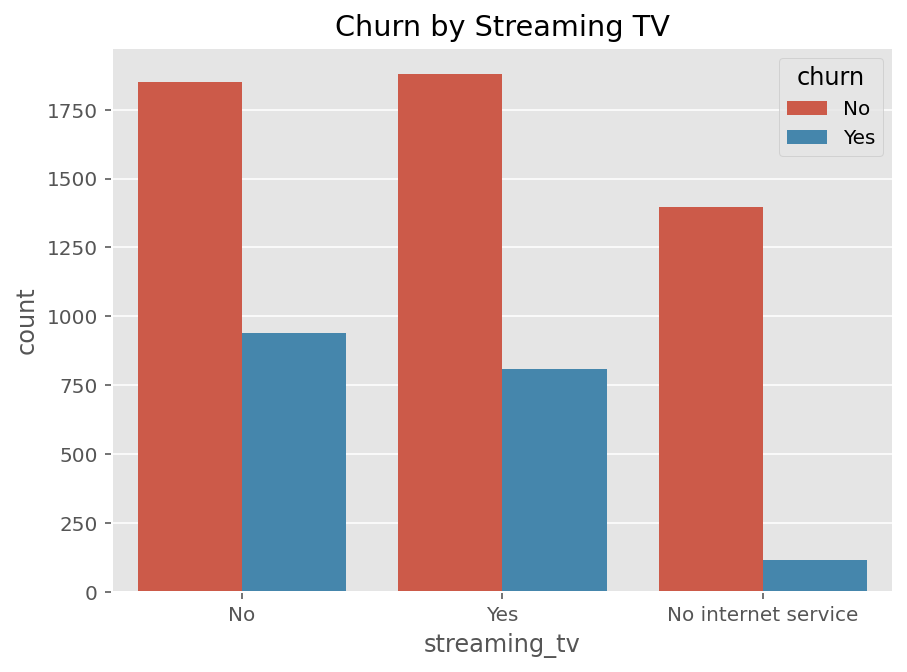

In [ ]:
# plotting the distribution of churn by streaming tv
plt.figure(figsize=(7, 5))
sns.countplot("streaming_tv", hue = 'churn', data = df)
plt.title("Churn by Streaming TV")
plt.show()

The difference in churn between those who streamed TV and those who did not appears to be minimal.

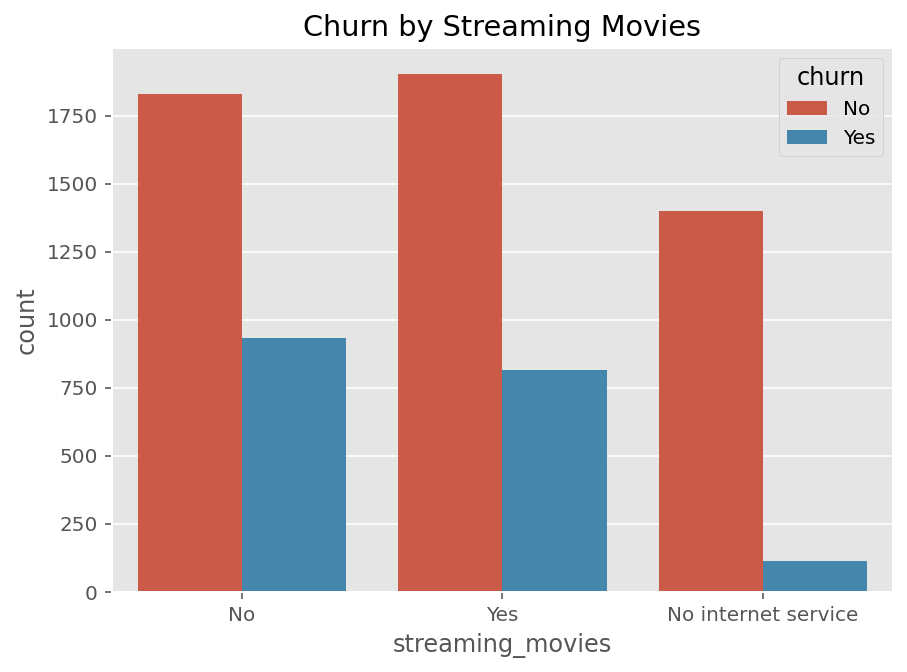

In [ ]:
# plotting the distribution of churn by streaming movies
plt.figure(figsize=(7, 5))
sns.countplot("streaming_movies", hue = 'churn', data = df)
plt.title("Churn by Streaming Movies")
plt.show()

There seems to be a minimal significant difference (if any) between the churn numbers of those who streamed movies and those who did not.

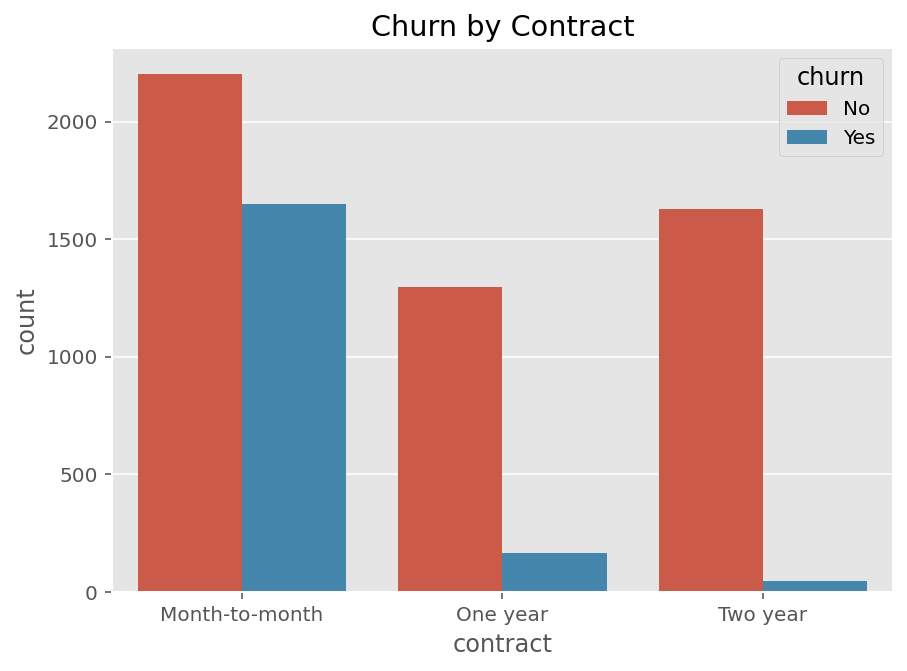

In [ ]:
# plotting the distribution of churn by contract
plt.figure(figsize=(7, 5))
sns.countplot("contract", hue = 'churn', data = df)
plt.title("Churn by Contract")
plt.show()

Those with month-to-month contracts were more likely to churn wile those with two-year contracts were the least likely to churn.

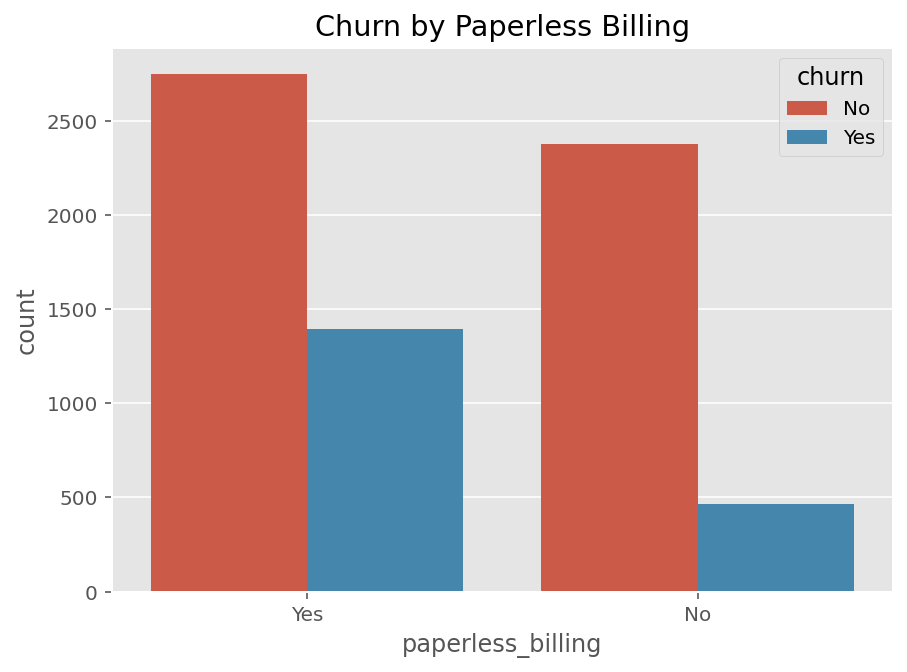

In [ ]:
# plotting the distribution of churn by paperless billing
plt.figure(figsize=(7, 5))
sns.countplot("paperless_billing", hue = 'churn', data = df)
plt.title("Churn by Paperless Billing")
plt.show()

Subscribers with paperless billing churned more than those without paperless billing.

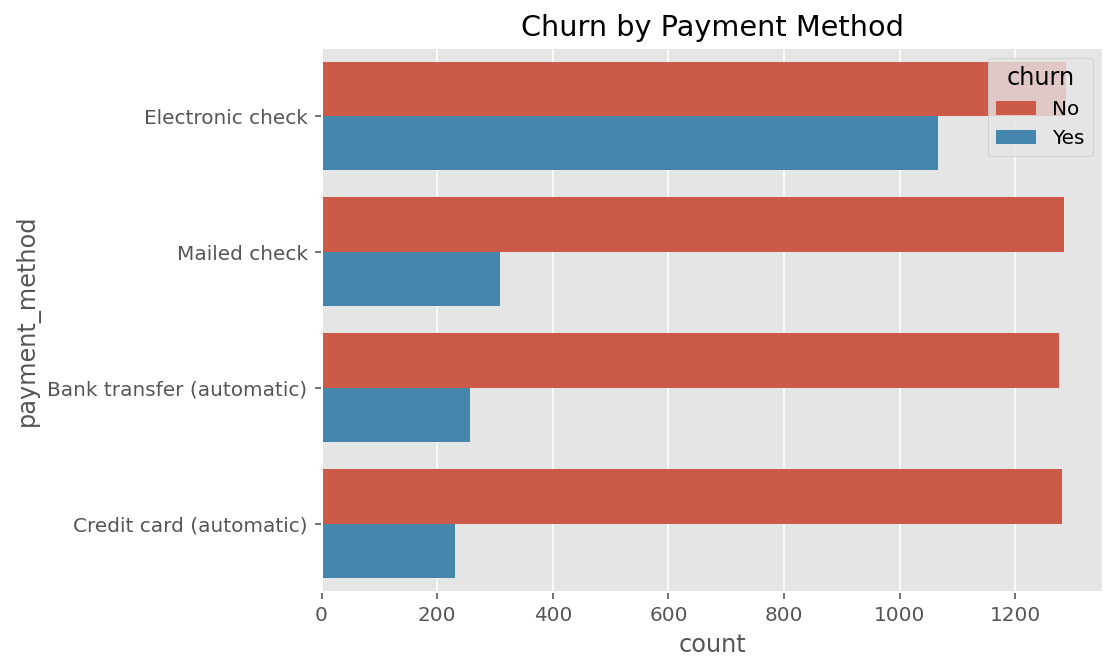

In [ ]:
# plotting the distribution of churn by payment method
plt.figure(figsize=(7, 5))
sns.countplot(y="payment_method", hue = 'churn', data = df, orient = 'h')
plt.title("Churn by Payment Method")
plt.show()

Customers who paid electronically churned more than those who paid via mailed check, bank transfer, or credit card.

### b) General Analysis

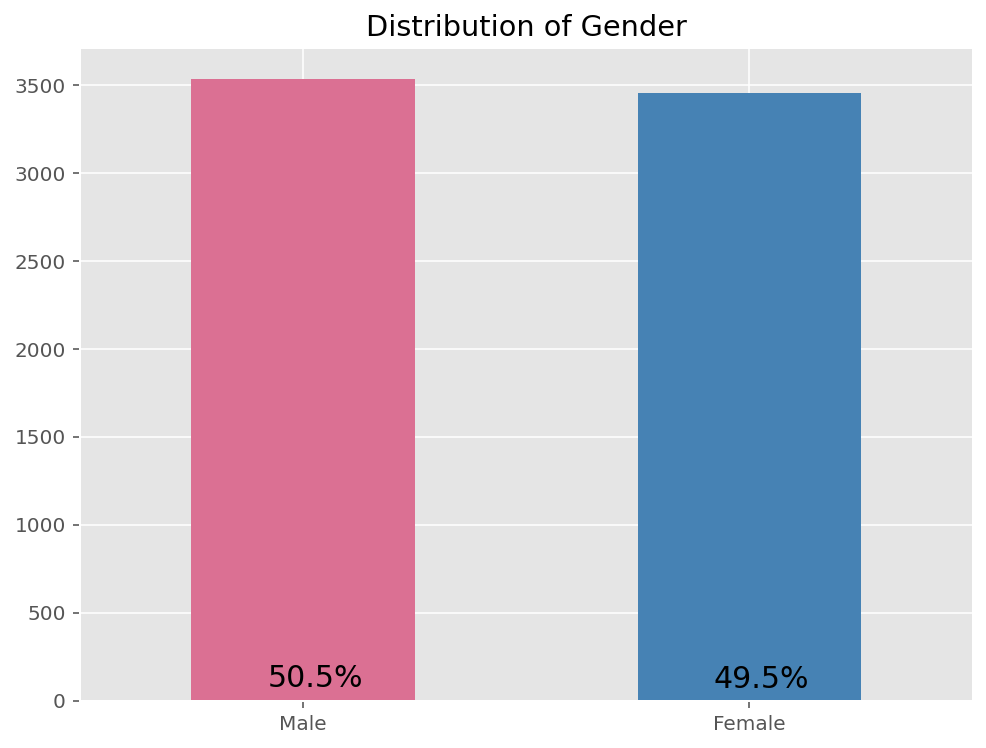

In [ ]:
# creating a data frame for gender
gender = pd.DataFrame(df.gender.value_counts())
gender.reset_index(inplace = True)
gender.columns = ['gender', 'count']
gender['pct'] = round(gender['count'] / gender['count'].sum() * 100, 1)


# previewing our data set's gender distribution
plt.figure(figsize = (8, 6))
df.gender.value_counts().plot(kind = 'bar', rot = 0, color = ['#DB7093', '#4682B4'])
xlocs, xlabs = plt.xticks()
for i, v in enumerate(gender['pct']):
    plt.text(xlocs[i] - 0.08, v + 25, str(v) + '%', fontsize = 15)
plt.title('Distribution of Gender')
plt.show()

The number of male and female subscribers is almost the same.

No     5858
Yes    1132
Name: senior_citizen, dtype: int64


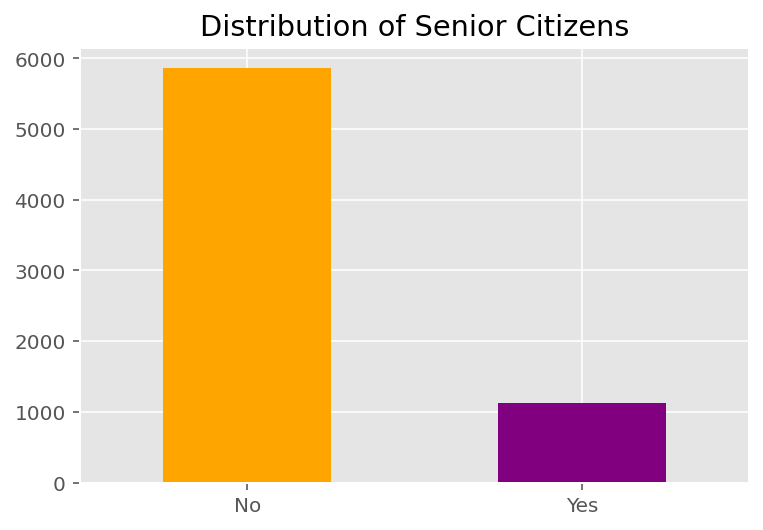

In [ ]:
print(df.senior_citizen.value_counts())
df.senior_citizen.value_counts().plot(kind = 'bar', rot = 0, color = ['orange', 'purple'])
plt.title('Distribution of Senior Citizens')
plt.show()

Few of the subscribers are senior citizens.

No     3618
Yes    3372
Name: partner, dtype: int64


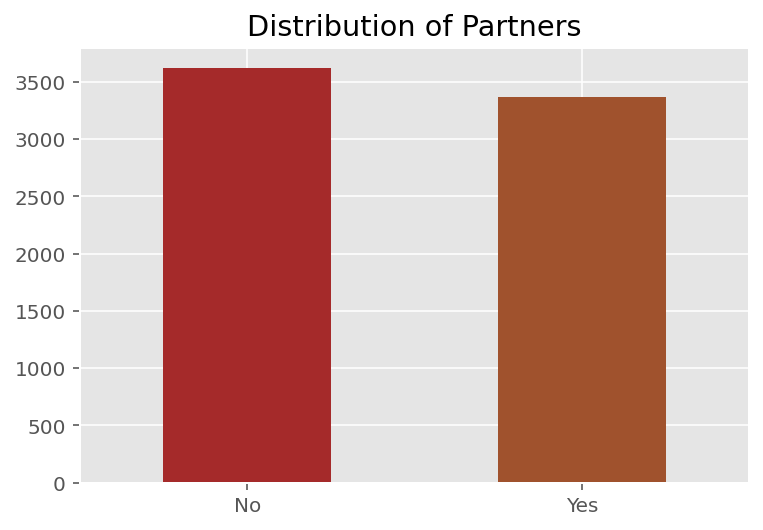

In [ ]:
print(df.partner.value_counts())
df.partner.value_counts().plot(kind = 'bar', rot = 0, color = ['brown', 'sienna'])
plt.title('Distribution of Partners')
plt.show()

The distribution of those with partners and those without partners is roughly the same.

No     4902
Yes    2088
Name: dependents, dtype: int64


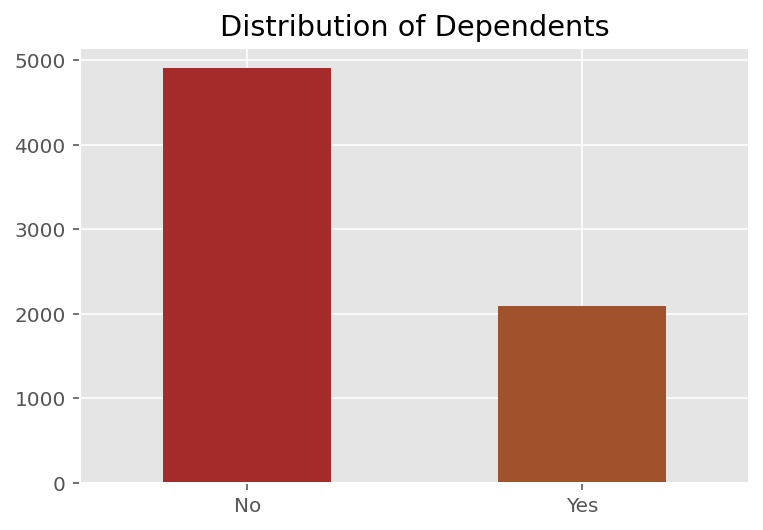

In [ ]:
print(df.dependents.value_counts())
df.dependents.value_counts().plot(kind = 'bar', rot = 0, color = ['brown', 'sienna'])
plt.title('Distribution of Dependents')
plt.show()

Majority of the subscribers do not have dependents.

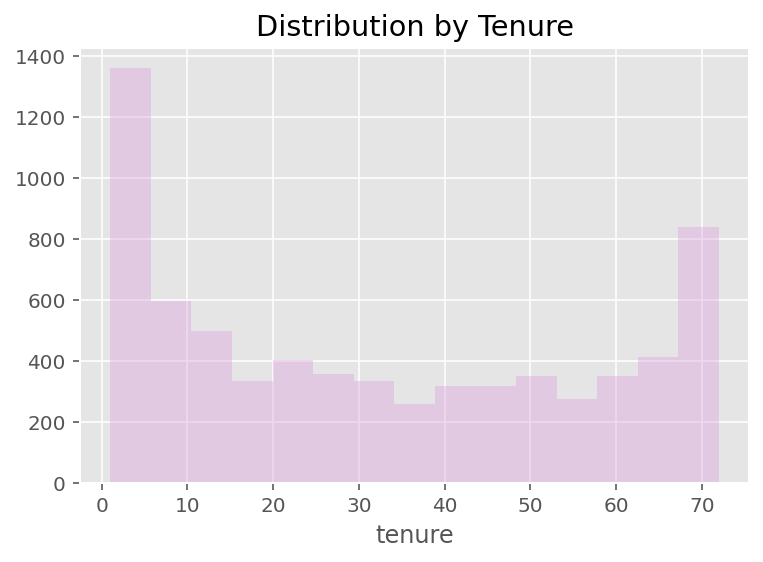

In [ ]:
sns.distplot(df.tenure, kde = False, color = "plum")
plt.title("Distribution by Tenure")
plt.show()

Majority have tenure of 1-5 followed by those with tenure between 67-72.

Yes    6312
No      678
Name: phone_service, dtype: int64


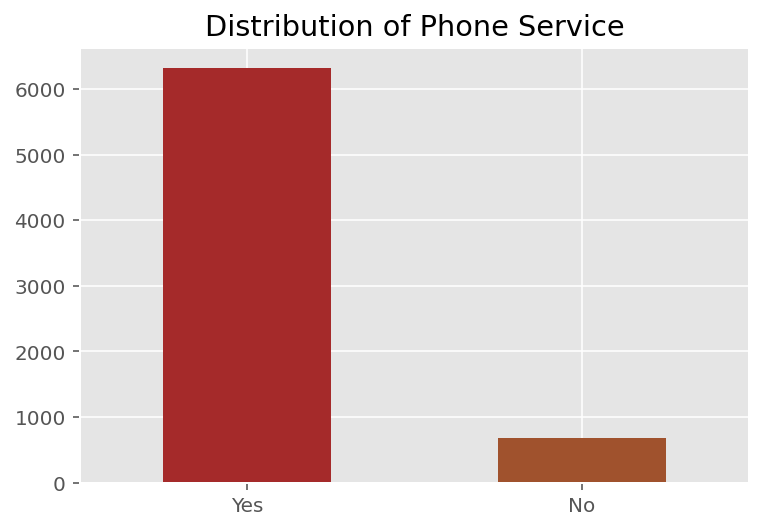

In [ ]:
print(df.phone_service.value_counts())
df.phone_service.value_counts().plot(kind = 'bar', rot = 0, color = ['brown', 'sienna'])
plt.title('Distribution of Phone Service')
plt.show()

Majority of the subscribers have phone service.

No                  3368
Yes                 2944
No phone service     678
Name: multiple_lines, dtype: int64


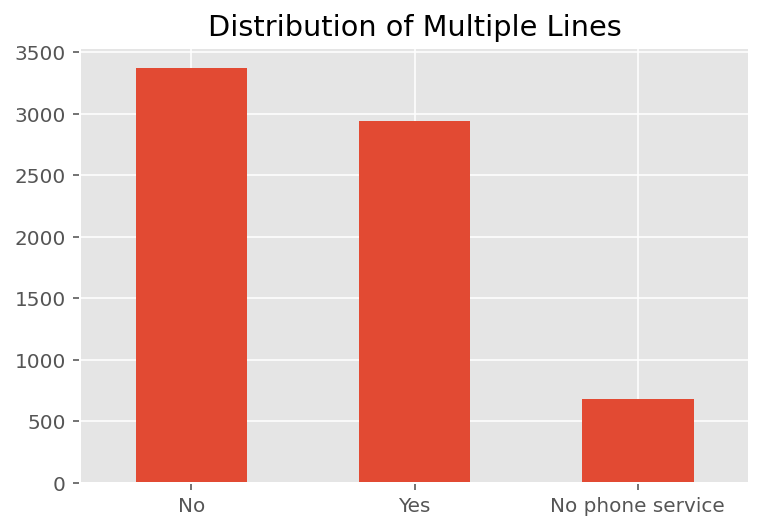

In [ ]:
print(df.multiple_lines.value_counts())
df.multiple_lines.value_counts().plot(kind = 'bar', rot = 0)
plt.title('Distribution of Multiple Lines')
plt.show()

Many subscribers did not have multiple lines while almost as many did. Few have multiple lines but no internet service.

Fiber optic    3078
DSL            2401
No             1511
Name: internet_service, dtype: int64


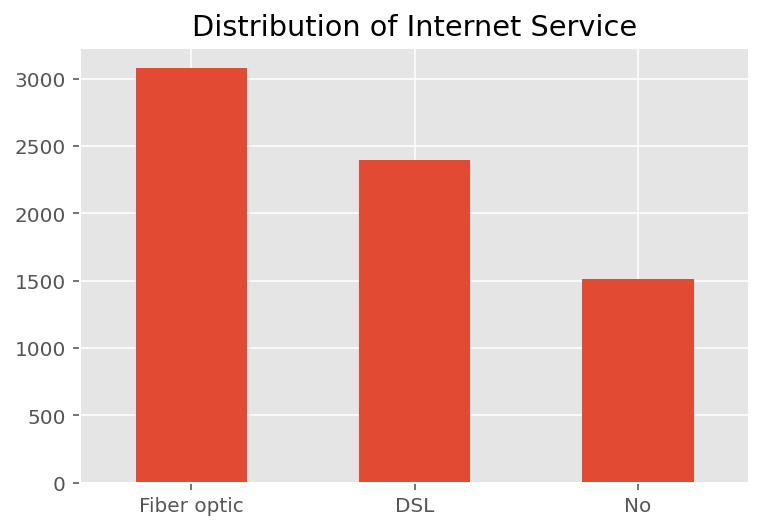

In [ ]:
print(df.internet_service.value_counts())
df.internet_service.value_counts().plot(kind = 'bar', rot = 0)
plt.title('Distribution of Internet Service')
plt.show()

Many have fiber optic, about three quarters of the same nymber have DSL, and roughly half of that number do not have internet service.

No                     3481
Yes                    1998
No internet service    1511
Name: online_security, dtype: int64


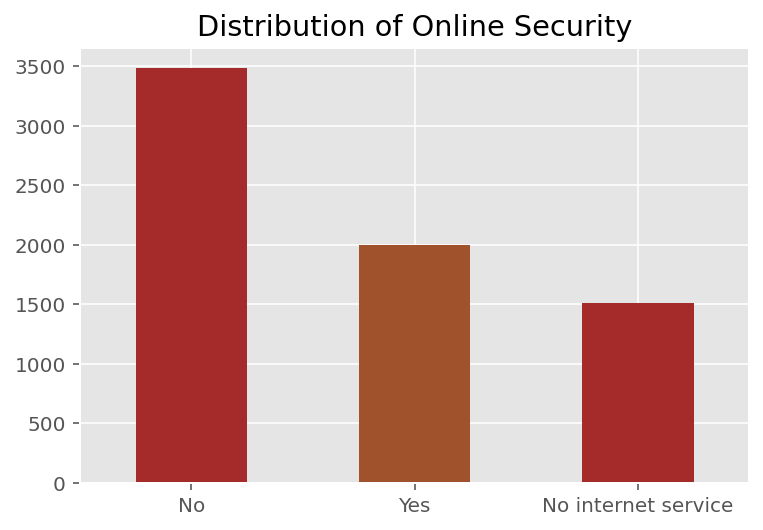

In [ ]:
print(df.online_security.value_counts())
df.online_security.value_counts().plot(kind = 'bar', rot = 0, color = ['brown', 'sienna'])
plt.title('Distribution of Online Security')
plt.show()

Majority of the subscribers do not have online security while half of that number has. Fewer still have online security but no internet service.

No                     3068
Yes                    2411
No internet service    1511
Name: online_backup, dtype: int64


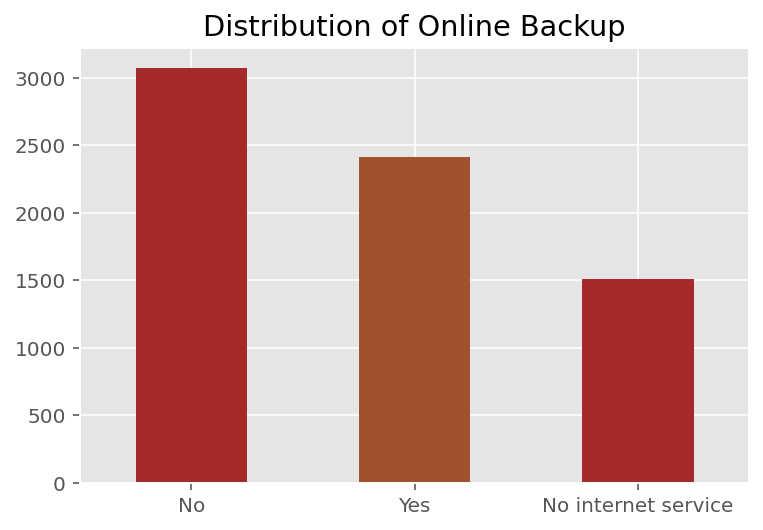

In [ ]:
print(df.online_backup.value_counts())
df.online_backup.value_counts().plot(kind = 'bar', rot = 0, color = ['brown', 'sienna'])
plt.title('Distribution of Online Backup')
plt.show()

Majority of the customers do not have online backup. Almost the same number has, while fewer have online backup but no internet service.

No                     3074
Yes                    2405
No internet service    1511
Name: device_protection, dtype: int64


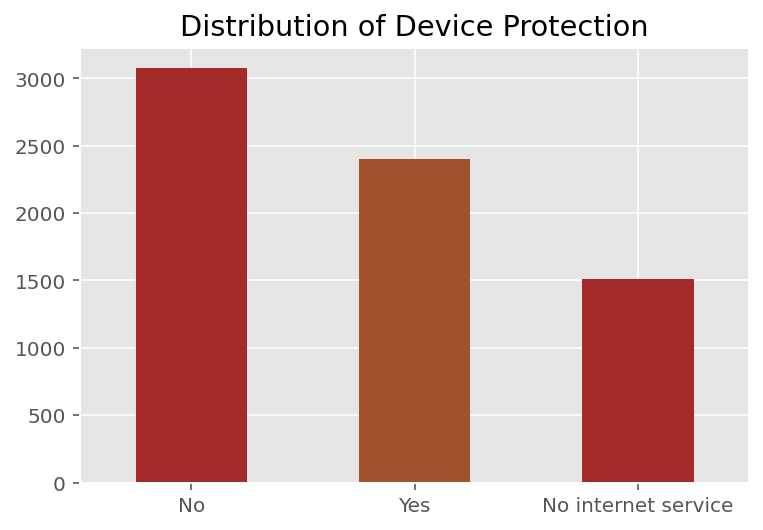

In [ ]:
print(df.device_protection.value_counts())
df.device_protection.value_counts().plot(kind = 'bar', rot = 0, color = ['brown', 'sienna'])
plt.title('Distribution of Device Protection')
plt.show()

Majority do not have device protection.

No                     3452
Yes                    2027
No internet service    1511
Name: tech_support, dtype: int64


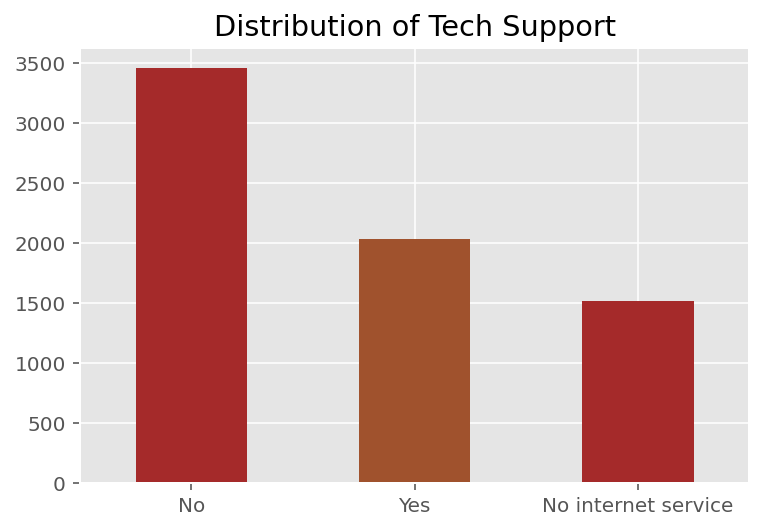

In [ ]:
print(df.tech_support.value_counts())
df.tech_support.value_counts().plot(kind = 'bar', rot = 0, color = ['brown', 'sienna'])
plt.title('Distribution of Tech Support')
plt.show()

Subscribers who do not receive tech support make up almost half of the data set.

No                     2789
Yes                    2690
No internet service    1511
Name: streaming_tv, dtype: int64


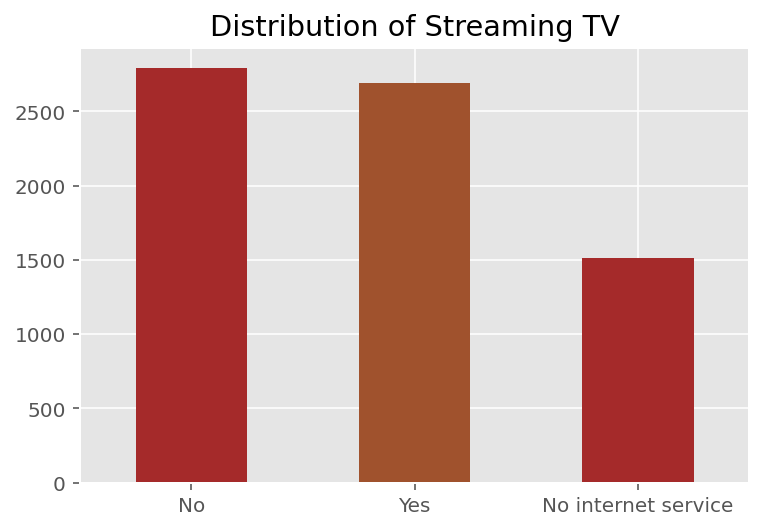

In [ ]:
print(df.streaming_tv.value_counts())
df.streaming_tv.value_counts().plot(kind = 'bar', rot = 0, color = ['brown', 'sienna'])
plt.title('Distribution of Streaming TV')
plt.show()

The number of customers who stream TV and those who do not are almost the same. The number of customers who stream TV but don't have internet service is the least.

No                     2762
Yes                    2717
No internet service    1511
Name: streaming_movies, dtype: int64


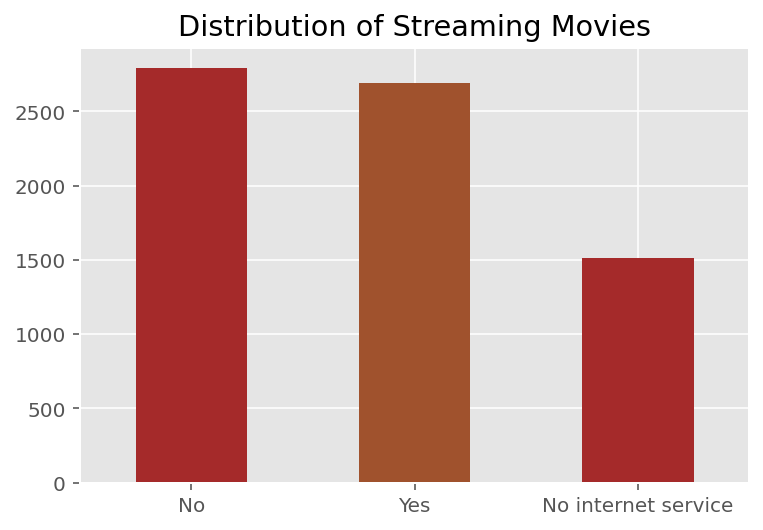

In [ ]:
print(df.streaming_movies.value_counts())
df.streaming_tv.value_counts().plot(kind = 'bar', rot = 0, color = ['brown', 'sienna'])
plt.title('Distribution of Streaming Movies')
plt.show()

The number of customers who stream movies and those who do not are almost the same. The number of customers who stream movies but don't have internet service is the least.

Month-to-month    3851
Two year          1675
One year          1464
Name: contract, dtype: int64


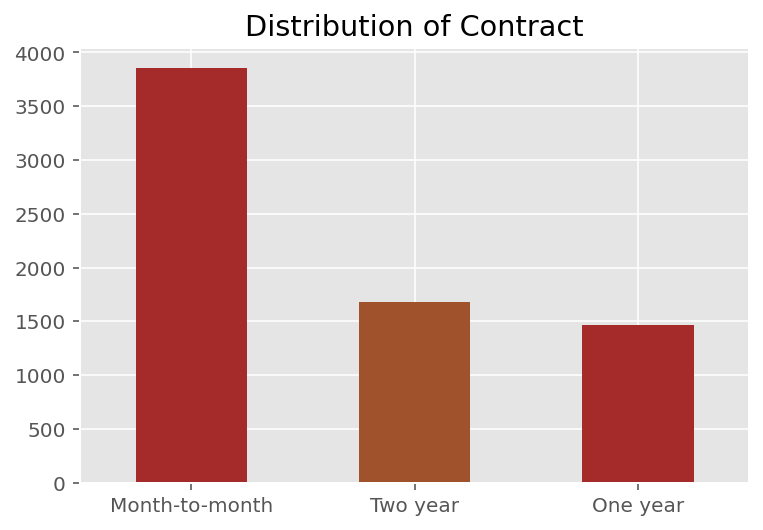

In [ ]:
print(df.contract.value_counts())
df.contract.value_counts().plot(kind = 'bar', rot = 0, color = ['brown', 'sienna'])
plt.title('Distribution of Contract')
plt.show()

Majority of the subscribers are on month-to-month contracts, followed by two-year contracts, and then one-year contracts.

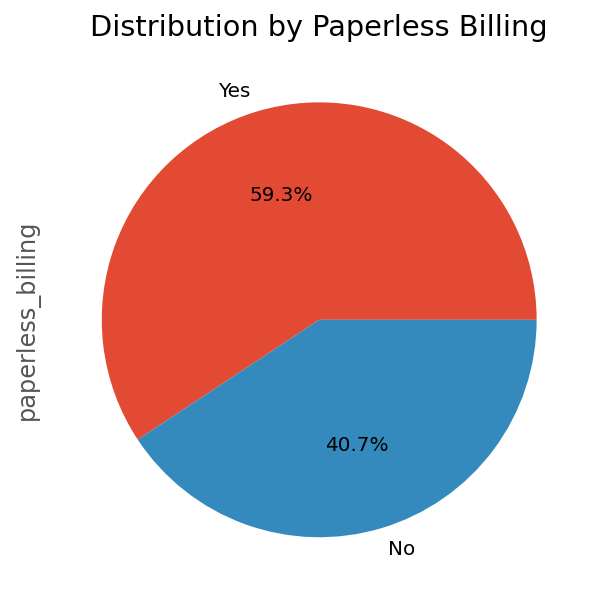

In [ ]:
plt.figure(figsize = (7, 5))
df.paperless_billing.value_counts().plot(kind = 'pie', autopct = "%1.1f%%")
plt.title("Distribution by Paperless Billing")
plt.show()

More than half of the subscribers use paperless billing.

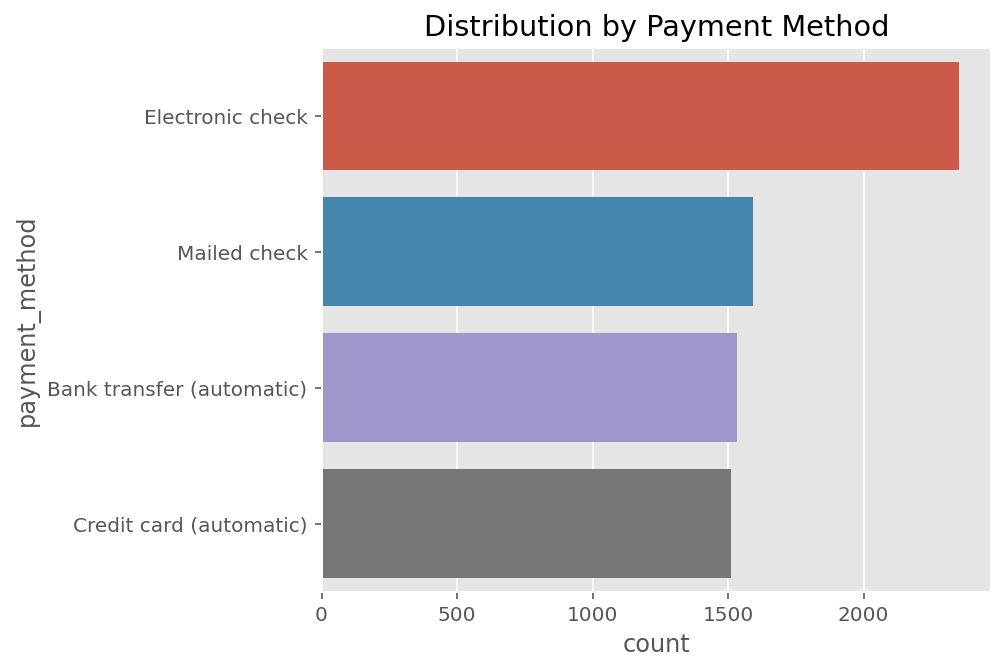

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(y = "payment_method", data = df)
plt.title("Distribution by Payment Method")
plt.show()

Electronic checks are the most popular form of payment while mailed checks, bank transfers, and credit cards are subsequently and similarly common.

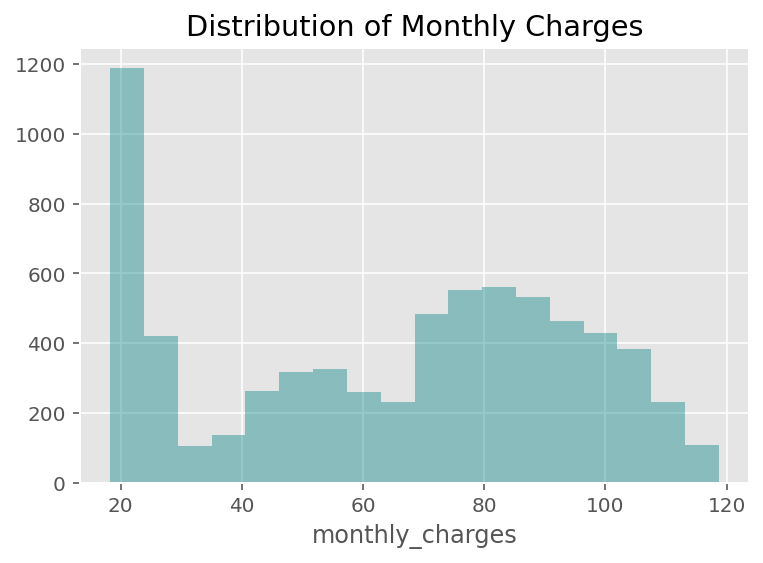

In [ ]:
sns.distplot(df.monthly_charges, kde = False, color = 'teal')
plt.title("Distribution of Monthly Charges")
plt.show()

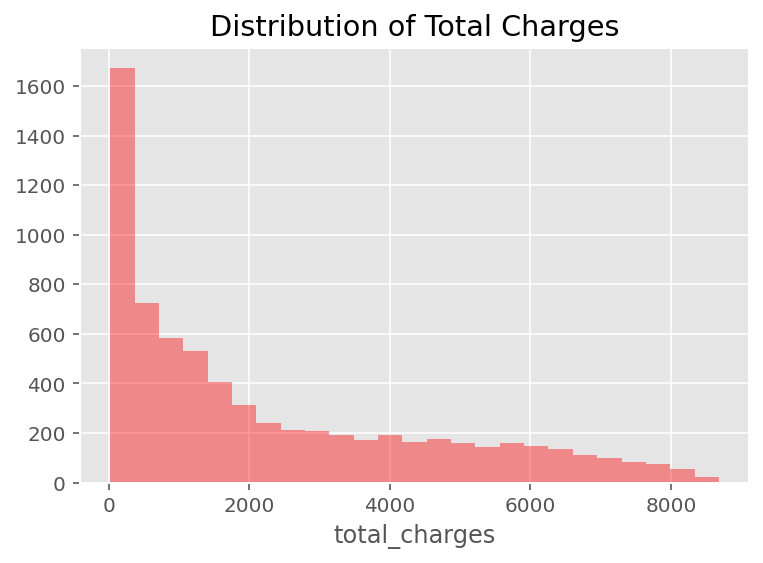

In [ ]:
sns.distplot(df.total_charges, kde = False, color = 'red')
plt.title("Distribution of Total Charges")
plt.show()

## <font color='#2F4F4F'>4. Summary of Findings</font>

Based on the results of the analysis, the following conclusions were arrived at:
* There is no significant difference in churn rate between male and female subscribers. So this is not an area management needs to worry about.
* Majority of the customers are not senior citizens so this makes this dataset biased and hard to identify whether being a senior citizen affects churn rate.
* Not having a partner increases the likelihood of churning.
* Not having dependents increases the likelihood of churning.
* Those with phone service are more likely to churn than those without. Again, however, the number of customers with phone service exceeds the number of those without phone service so we cannot be absolutely certain that those without phone service do not or will not churn.
* Whether you have multiple lines or not does not have a significant impact on the churn rate.
* Customers with fiber optic internet service are more likely to churn than those with DSL internet service.
* Not having online security, online backup, device protection, and tech support are high predictors of churning.
* Having all MTN provided services (online security, device protection, etc.) but no phone service leads to low churn rates. However, such categories make up the minority and so do not provide us with enough information to make a valid conclusion.
* Not streaming TV and movies provides a low but guaranteed possibility of churning.
* Month-to-month contract subscribers make up the majority of the customers in the dataset and, therefore return the highest churn rate. However, the interesting thing to note is that while those with two-year contracts outnumber those with one-year contracts, the former were less likely to churn than the latter.
* Paperless billing can be linked to higher churn rates than non-paperless billing.
* Since they are the dominant method of payment, electronic checks resulted in higher churn rates than the other payment methods.

## <font color='#2F4F4F'>5. Recommendations</font>

In order to create an effective customer retention program, management should take the following measures:
* Focus more on meeting the needs of non-senior citizens.
* Focus more on having customers that have partners and/or dependents since these people are less likely to churn. Alternatively, management can come up with services specifically designed for customers without parters and/or dependents. This would require additional research.
* Focus on customers with fiber optics internet service as they are most likely to churn.
* Encourage subscribers to get online security, online backup, device protection, and tech support.
* Get more subscribers to stream movies and TV.
* Create strategies to reduce churn rates for those on month-to-month and one-year contracts.
* Digital services such as phone service, payment via electronic checks, and paperless billing are linked to majority of the subscribers in the dataset and, therefore, produce the highest churn rates. Since it would be illogical to expect customers to move away from these because we live in a digital era, management can, instead, look into why customers churned despite having those services so they can come up with better strategies to retain them.

## <font color='#2F4F4F'>6. Challenging your Solution</font>

### a). Did we have the right data? Do we need other data to answer our question?

As far as I can tell, we had the right data. However, more data is still needed, particularly those with more customers who churned so we can have a better understanding of why they might have churned.

### b). Did we have the right question?

Yes, we did.